# CS6421 Final Project: Deep Learning


---


Name: Rebecca Vella 

Student Number: 119224527

Course Code: CS6421

Lecturer: Prof. G. Provan

# BASIC AUTOENCODER


---



In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

#try:
  # The %tensorflow_version magic only works in colab.
  # tensorflow_version 2.x
#except Exception:
#  pass
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras import metrics

from tensorflow.keras.datasets import mnist

print('TensorFlow version:', tf.__version__)
print('Is Executing Eagerly?', tf.executing_eagerly())

TensorFlow version: 2.2.0-rc2
Is Executing Eagerly? True


In [0]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder, self).__init__()

        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
    
    def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return self.output_layer(activation)

class Decoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        activation = self.hidden_layer(code)
        return self.output_layer(activation)

class Autoencoder(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder, self).__init__()
    self.loss = []
    self.encoder = Encoder(intermediate_dim=intermediate_dim)
    self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

In [0]:
def loss(preds, real):
  return tf.reduce_mean(tf.square(tf.subtract(preds, real)))

def train(loss, model, opt, original):
  with tf.GradientTape() as tape:
    preds = model(original)
    reconstruction_error = loss(preds, original)
  gradients = tape.gradient(reconstruction_error, model.trainable_variables)
  gradient_variables = zip(gradients, model.trainable_variables)
  opt.apply_gradients(gradient_variables)
  
  return reconstruction_error

def train_loop(model, opt, loss, dataset, epochs):
  for epoch in range(epochs):
    epoch_loss = 0
    for step, batch_features in enumerate(dataset):
      loss_values = train(loss, model, opt, batch_features)
      epoch_loss += loss_values
    model.loss.append(epoch_loss)
    print('Epoch {}/{}. Loss: {}'.format(epoch + 1, epochs, epoch_loss.numpy()))

In [0]:
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train / 255.

x_train = x_train.astype(np.float32)
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))

training_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(256)

11493376/11490434 [==============================] - 0s 0us/step


# DNN - Basic Model

Epoch 1/20. Loss: 9.108835220336914
Epoch 2/20. Loss: 6.043872833251953
Epoch 3/20. Loss: 5.596360206604004
Epoch 4/20. Loss: 5.386218070983887
Epoch 5/20. Loss: 5.273069381713867
Epoch 6/20. Loss: 5.193350315093994
Epoch 7/20. Loss: 5.138091564178467
Epoch 8/20. Loss: 5.085888385772705
Epoch 9/20. Loss: 5.05357027053833
Epoch 10/20. Loss: 5.027644157409668
Epoch 11/20. Loss: 5.009897708892822
Epoch 12/20. Loss: 4.990187168121338
Epoch 13/20. Loss: 4.959112644195557
Epoch 14/20. Loss: 4.926471710205078
Epoch 15/20. Loss: 4.941493034362793
Epoch 16/20. Loss: 4.91623067855835
Epoch 17/20. Loss: 4.9095306396484375
Epoch 18/20. Loss: 4.906772136688232
Epoch 19/20. Loss: 4.910755157470703
Epoch 20/20. Loss: 4.897375106811523


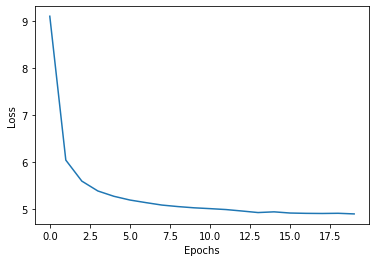

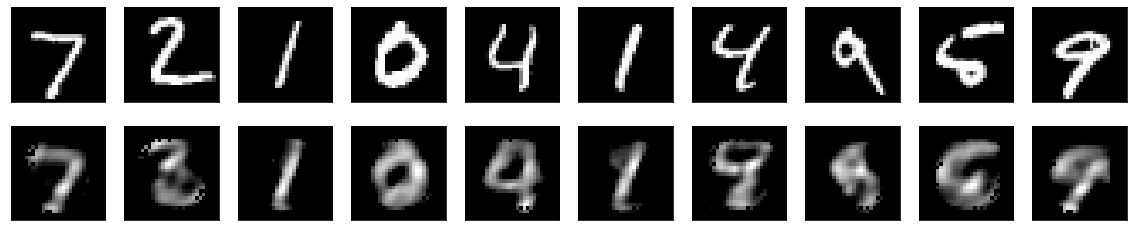

In [0]:
model = Autoencoder(intermediate_dim=128, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)

train_loop(model, opt, loss, training_dataset, 20)

plt.plot(range(20), model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# DNN - Complex Model 1

Epoch 1/20. Loss: 9.73504638671875
Epoch 2/20. Loss: 5.234167575836182
Epoch 3/20. Loss: 4.703186988830566
Epoch 4/20. Loss: 4.398471355438232
Epoch 5/20. Loss: 4.268494129180908
Epoch 6/20. Loss: 4.098394393920898
Epoch 7/20. Loss: 3.939166307449341
Epoch 8/20. Loss: 3.8946475982666016
Epoch 9/20. Loss: 3.7689144611358643
Epoch 10/20. Loss: 3.7315704822540283
Epoch 11/20. Loss: 3.688600540161133
Epoch 12/20. Loss: 3.640471935272217
Epoch 13/20. Loss: 3.633148431777954
Epoch 14/20. Loss: 3.578145742416382
Epoch 15/20. Loss: 3.5730855464935303
Epoch 16/20. Loss: 3.5884358882904053
Epoch 17/20. Loss: 3.5343761444091797
Epoch 18/20. Loss: 3.5702738761901855
Epoch 19/20. Loss: 3.5531632900238037
Epoch 20/20. Loss: 3.5408616065979004


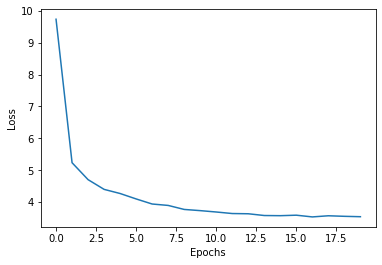

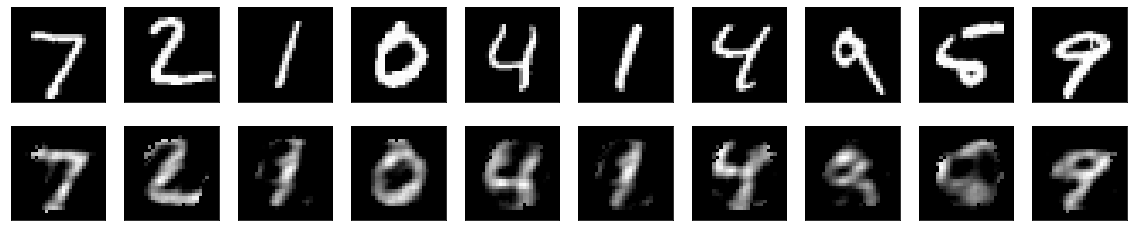

In [0]:
model = Autoencoder(intermediate_dim=256, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)

train_loop(model, opt, loss, training_dataset, 20)

plt.plot(range(20), model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# DNN - Complex Model 2

In [0]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        code_size = 64
        super(Encoder, self).__init__()

        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=code_size, activation=tf.nn.relu)
    
    def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return self.output_layer(activation)

class Decoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        activation = self.hidden_layer(code)
        return self.output_layer(activation)

class Autoencoder(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder, self).__init__()
    self.loss = []
    self.encoder = Encoder(intermediate_dim=intermediate_dim)
    self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

Epoch 1/20. Loss: 8.184905052185059
Epoch 2/20. Loss: 5.203522205352783
Epoch 3/20. Loss: 4.695635795593262
Epoch 4/20. Loss: 4.4228105545043945
Epoch 5/20. Loss: 4.264799118041992
Epoch 6/20. Loss: 4.109020709991455
Epoch 7/20. Loss: 4.031910419464111
Epoch 8/20. Loss: 3.9794821739196777
Epoch 9/20. Loss: 3.973567247390747
Epoch 10/20. Loss: 3.9384162425994873
Epoch 11/20. Loss: 3.921016216278076
Epoch 12/20. Loss: 3.8915350437164307
Epoch 13/20. Loss: 3.914937973022461
Epoch 14/20. Loss: 3.860146999359131
Epoch 15/20. Loss: 3.8664276599884033
Epoch 16/20. Loss: 3.88158917427063
Epoch 17/20. Loss: 3.8374266624450684
Epoch 18/20. Loss: 3.8483927249908447
Epoch 19/20. Loss: 3.8477675914764404
Epoch 20/20. Loss: 3.841822624206543


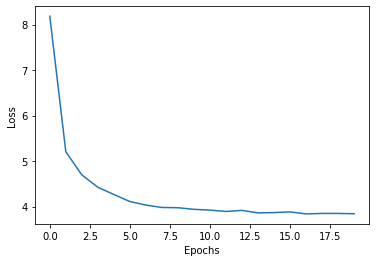

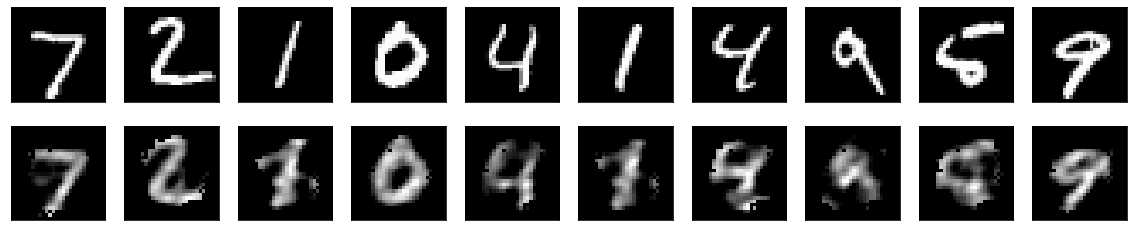

In [0]:
model = Autoencoder(intermediate_dim=128, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)

train_loop(model, opt, loss, training_dataset, 20)

plt.plot(range(20), model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# CNN - Basic Model

In [0]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
# to train this model we will with original MNIST digits with shape (samples, 3, 28, 28) and we will just normalize pixel values between 0 and 1
# (x_train, _), (x_test, _) = load_data('../input/mnist.npz')
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [0]:
autoencoder.fit(x_train, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 4s 8ms/step - loss: 0.6969 - val_loss: 0.6957
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 0.6946 - val_loss: 0.6934
Epoch 3/100
469/469 [==============================] - 3s 7ms/step - loss: 0.6921 - val_loss: 0.6907
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 0.6891 - val_loss: 0.6872
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 0.6846 - val_loss: 0.6815
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 0.6759 - val_loss: 0.6686
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 0.6511 - val_loss: 0.6238
Epoch 8/100
469/469 [==============================] - 3s 7ms/step - loss: 0.5626 - val_loss: 0.5055
Epoch 9/100
469/469 [==============================] - 4s 8ms/step - loss: 0.4893 - val_loss: 0.4877
Epoch 10/100
469/469 [==============================] - 4s 8ms/step - loss: 0.4800 - val_lo

# CNN - Complex Model 1

In [0]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='relu', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
autoencoder.fit(x_train, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0397 - val_loss: 0.0265
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0237 - val_loss: 0.0216
Epoch 3/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0201 - val_loss: 0.0186
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0181 - val_loss: 0.0171
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0169 - val_loss: 0.0160
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0160 - val_loss: 0.0155
Epoch 7/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0153 - val_loss: 0.0147
Epoch 8/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0147 - val_loss: 0.0141
Epoch 9/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0143 - val_loss: 0.0138
Epoch 10/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0139 - val_lo

# CNN - Complex Model 2

In [0]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(128, (5, 5), activation='relu', padding='same')(input_img)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)     

x = tf.keras.layers.Conv2D(128, (5, 5), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)   

decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='relu', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
autoencoder.fit(x_train, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 6s 13ms/step - loss: 0.0024 - val_loss: 6.3325e-04
Epoch 2/100
469/469 [==============================] - 6s 13ms/step - loss: 5.3997e-04 - val_loss: 4.4452e-04
Epoch 3/100
469/469 [==============================] - 6s 13ms/step - loss: 4.0602e-04 - val_loss: 3.5895e-04
Epoch 4/100
469/469 [==============================] - 6s 13ms/step - loss: 3.3664e-04 - val_loss: 3.7803e-04
Epoch 5/100
469/469 [==============================] - 6s 13ms/step - loss: 2.9487e-04 - val_loss: 2.6154e-04
Epoch 6/100
469/469 [==============================] - 6s 13ms/step - loss: 2.5635e-04 - val_loss: 2.4187e-04
Epoch 7/100
469/469 [==============================] - 6s 13ms/step - loss: 2.3726e-04 - val_loss: 2.3264e-04
Epoch 8/100
469/469 [==============================] - 6s 13ms/step - loss: 2.1486e-04 - val_loss: 2.0204e-04
Epoch 9/100
469/469 [==============================] - 6s 13ms/step - loss: 1.9637e-04 - val_loss: 1.9145e-04
Epoch 10/100
4

# DE-NOISING AUTOENCODER

---



In [0]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Introduce noise with a probability factor of 0.5
noise_factor = 0.5
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

11493376/11490434 [==============================] - 2s 0us/step


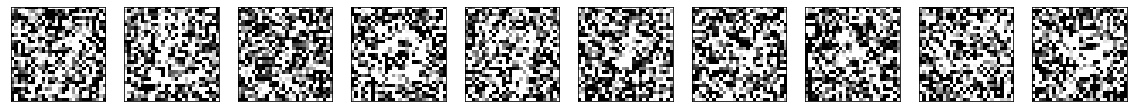

In [0]:
# Plot figures to show what the noisy digits look like
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
training_dataset = tf.data.Dataset.from_tensor_slices(x_train_noisy).batch(256)

# DNN - Basic Model

In [0]:
hidden_size = 128

input_img = tf.keras.layers.Input(shape=(28, 28, 1))
    
#encoder 
hidden_1 = tf.keras.layers.Dense(units=hidden_size, activation=tf.nn.relu)(input_img)
code = tf.keras.layers.Dense(units=hidden_size, activation=tf.nn.relu)(hidden_1)
    
#decoder
hidden_2 = tf.keras.layers.Dense(units=hidden_size, activation=tf.nn.relu)(code)
output_img = tf.keras.layers.Dense(units=1, activation=tf.nn.relu)(hidden_2)
     
#model
autoencoder = tf.keras.models.Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
autoencoder.fit(x_train_noisy, x_train, epochs=20, batch_size=128, 
                shuffle=True, validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/20
469/469 [==============================] - 11s 24ms/step - loss: 0.0895 - val_loss: 0.0903
Epoch 2/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0889 - val_loss: 0.0903
Epoch 3/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0888 - val_loss: 0.0903
Epoch 4/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0888 - val_loss: 0.0903
Epoch 5/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0888 - val_loss: 0.0904
Epoch 6/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0888 - val_loss: 0.0902
Epoch 7/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0888 - val_loss: 0.0907
Epoch 8/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0889 - val_loss: 0.0907
Epoch 9/20
469/469 [==============================] - 11s 23ms/step - loss: 0.0889 - val_loss: 0.0903
Epoch 10/20
469/469 [==============================] - 11s 23ms/step - loss: 0.088

# DNN - Complex Model 1

In [0]:
code_size = 32

input_img = tf.keras.layers.Input(shape=(28, 28, 1))
    
#encoder 
hidden_1 = tf.keras.layers.Dense(units=64, activation=tf.nn.relu)(input_img)
hidden_2 = tf.keras.layers.Dense(units=32, activation=tf.nn.relu)(hidden_1)
code = tf.keras.layers.Dense(units=code_size, activation=tf.nn.relu)(hidden_2)
    
#decoder
hidden_4 = tf.keras.layers.Dense(units=32, activation=tf.nn.relu)(code)
hidden_5 = tf.keras.layers.Dense(units=32, activation=tf.nn.relu)(hidden_4)
output_img = tf.keras.layers.Dense(units=1, activation=tf.nn.relu)(hidden_5)
     
#model
autoencoder = tf.keras.models.Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
autoencoder.fit(x_train_noisy, x_train, epochs=20, batch_size=128, 
                shuffle=True, validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1120 - val_loss: 0.1143
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1120 - val_loss: 0.1143
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1120 - val_loss: 0.1143
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1120 - val_loss: 0.1143
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1120 - val_loss: 0.1143
Epoch 6/20
469/469 [==============================] - 7s 14ms/step - loss: 0.1120 - val_loss: 0.1143
Epoch 7/20
469/469 [==============================] - 7s 14ms/step - loss: 0.1120 - val_loss: 0.1143
Epoch 8/20
469/469 [==============================] - 7s 14ms/step - loss: 0.1120 - val_loss: 0.1143
Epoch 9/20
469/469 [==============================] - 7s 14ms/step - loss: 0.1120 - val_loss: 0.1143
Epoch 10/20
469/469 [==============================] - 7s 14ms/step - loss: 0.1120 - val_lo

# CNN - Basic Model

In [0]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
# This will train for 100 epochs
autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 [==============================] - 4s 8ms/step - loss: 0.6794 - val_loss: 0.6761
Epoch 2/100
469/469 [==============================] - 4s 8ms/step - loss: 0.6710 - val_loss: 0.6651
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 0.6556 - val_loss: 0.6442
Epoch 4/100
469/469 [==============================] - 4s 8ms/step - loss: 0.6233 - val_loss: 0.5961
Epoch 5/100
469/469 [==============================] - 4s 8ms/step - loss: 0.5477 - val_loss: 0.4991
Epoch 6/100
469/469 [==============================] - 4s 8ms/step - loss: 0.4756 - val_loss: 0.4696
Epoch 7/100
469/469 [==============================] - 4s 8ms/step - loss: 0.4600 - val_loss: 0.4583
Epoch 8/100
469/469 [==============================] - 4s 8ms/step - loss: 0.4483 - val_loss: 0.4459
Epoch 9/100
469/469 [==============================] - 4s 8ms/step - loss: 0.4355 - val_loss: 0.4323
Epoch 10/100
469/469 [==============================] - 4s 8ms/step - loss: 0.4214 - val_lo

# CNN - Complex Model 1

In [0]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='relu', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0603 - val_loss: 0.0527
Epoch 2/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0504 - val_loss: 0.0483
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0476 - val_loss: 0.0466
Epoch 4/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0460 - val_loss: 0.0459
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0450 - val_loss: 0.0441
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0442 - val_loss: 0.0433
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0434 - val_loss: 0.0426
Epoch 8/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0429 - val_loss: 0.0424
Epoch 9/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0425 - val_loss: 0.0417
Epoch 10/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0420 - val_lo

# TEXT RECONSTRUCTION APPLICATION

---



In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import os
from pathlib import Path
import glob
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imsave
from keras.preprocessing.image import load_img, array_to_img, img_to_array, ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Input
from keras.optimizers import SGD, Adam, Adadelta, Adagrad
from keras import backend as K
from sklearn.model_selection import train_test_split
from IPython.display import Image
np.random.seed(111)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [0]:
def plotImages( images_arr, n_images=4):
    fig, axes = plt.subplots(n_images, n_images, figsize=(12,12))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        if img.ndim != 2:
            img = img.reshape((420,540))
        ax.imshow( img, cmap="Greys_r")
        ax.set_xticks(())
        ax.set_yticks(())
    plt.tight_layout()

In [0]:
noisy_train_url = 'https://github.com/gmprovan/CS6421-Assignment1/blob/master/train.zip?raw=true'
noisy_train_path_to_zip = tf.keras.utils.get_file('train.zip', origin=noisy_train_url, extract=True)
noisy_train_path = os.path.join(os.path.dirname(noisy_train_path_to_zip), 'train')

images = os.listdir(noisy_train_path)
noisy_train_image_paths = []

for i in images:
  noisy_train_image_paths.append(noisy_train_path+'/'+i)

noisy_test_url = 'https://github.com/gmprovan/CS6421-Assignment1/blob/master/test.zip?raw=true' 
noisy_test_path_to_zip = tf.keras.utils.get_file('test.zip', origin=noisy_test_url, extract=True)
noisy_test_path = os.path.join(os.path.dirname(noisy_test_path_to_zip), 'test')

images = os.listdir(noisy_test_path)
noisy_test_image_paths = []

for i in images:
  noisy_test_image_paths.append(noisy_test_path+'/'+i)

clean_train_url = 'https://github.com/gmprovan/CS6421-Assignment1/blob/master/train_cleaned.zip?raw=true'
clean_train_path_to_zip = tf.keras.utils.get_file('train_cleaned.zip', origin=clean_train_url, extract=True)
clean_train_path = os.path.join(os.path.dirname(clean_train_path_to_zip), 'train_cleaned')

images = os.listdir(clean_train_path)
clean_train_image_paths = []

for i in images:
  clean_train_image_paths.append(clean_train_path+'/'+i)

6610944/6605986 [==============================] - 0s 0us/step


In [0]:
X = []
Y = []

for img in noisy_train_image_paths:
    img = load_img(img, color_mode='grayscale', target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    X.append(img)

for img in clean_train_image_paths:
    img = load_img(img, color_mode='grayscale', target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    Y.append(img)

X = np.array(X)
Y = np.array(Y)

print("Size of X : ", X.shape)
print("Size of Y : ", Y.shape)

# Split the dataset into training and validation. Always set the random state!!
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=111)
print("Total number of training samples: ", X_train.shape)
print("Total number of validation samples: ", X_valid.shape)

Size of X :  (144, 420, 540, 1)
Size of Y :  (144, 420, 540, 1)
Total number of training samples:  (129, 420, 540, 1)
Total number of validation samples:  (15, 420, 540, 1)


In [0]:
Z=[]

for img in noisy_test_image_paths:
    img = load_img(img, color_mode='grayscale', target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    Z.append(img)

Z = np.array(Z)
print("Size of Z : ", Z.shape)

Size of Z :  (72, 420, 540, 1)


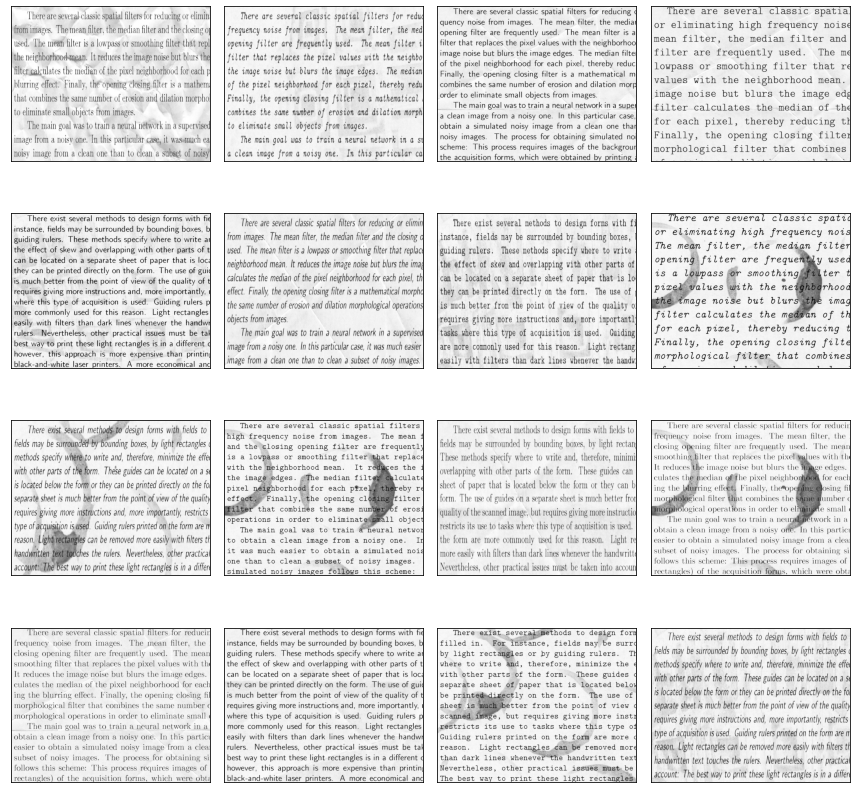

In [0]:
plotImages(X)

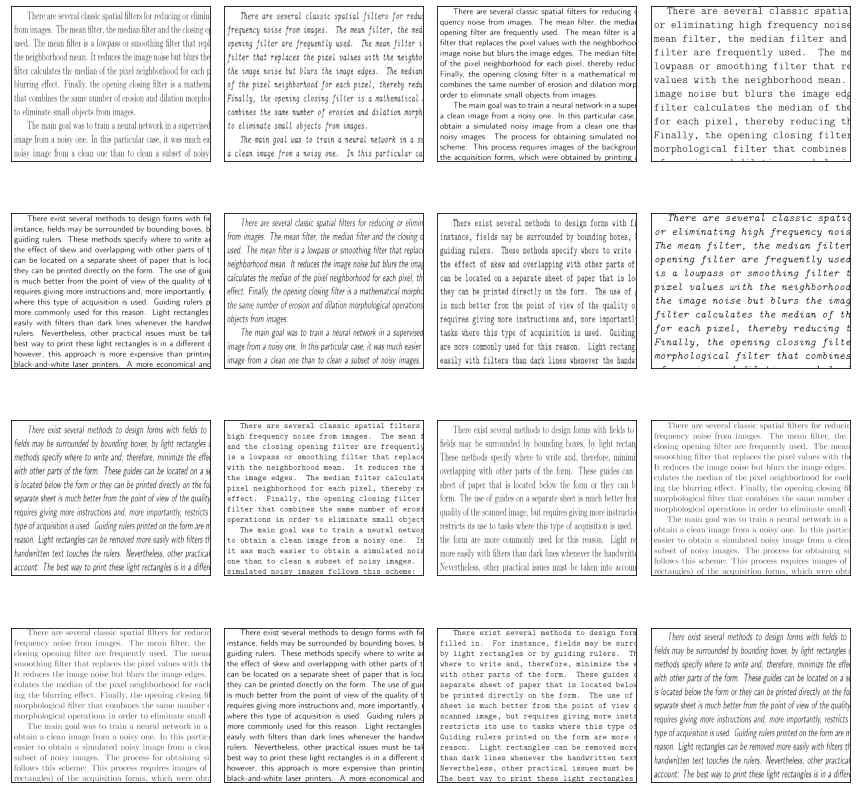

In [0]:
plotImages(Y)

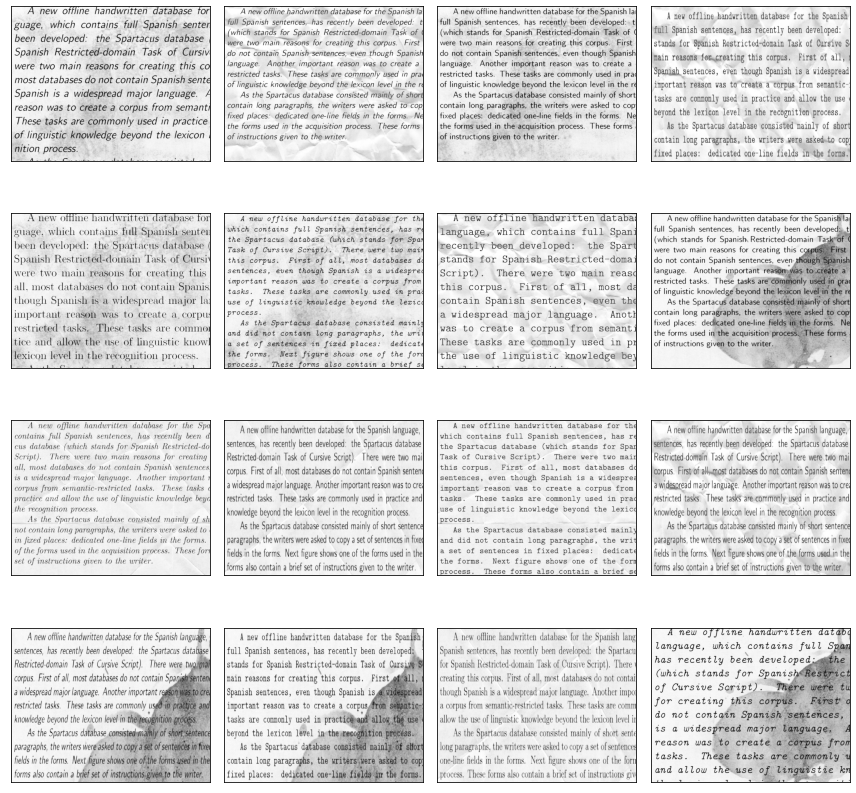

In [0]:
plotImages(Z)

# DNN - Basic Model



In [0]:
input_size = 226800
hidden_size = 128

input_img = tf.keras.layers.Input(shape=(420,540,1), name='image_input')
    
#encoder 
hidden_1 = tf.keras.layers.Dense(units=hidden_size, activation=tf.nn.relu)(input_img)
code = tf.keras.layers.Dense(units=hidden_size, activation=tf.nn.relu)(hidden_1)
    
#decoder
hidden_2 = tf.keras.layers.Dense(units=hidden_size, activation=tf.nn.relu)(code)
output_img = tf.keras.layers.Dense(units=1, activation=tf.nn.relu)(hidden_2)
     
#model
autoencoder = tf.keras.models.Model(input_img, output_img)

autoencoder.compile(optimizer='adam', loss=tf.keras.metrics.mean_squared_error,
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     [(None, 420, 540, 1)]     0         
_________________________________________________________________
dense_4 (Dense)              (None, 420, 540, 128)     256       
_________________________________________________________________
dense_5 (Dense)              (None, 420, 540, 128)     16512     
_________________________________________________________________
dense_6 (Dense)              (None, 420, 540, 128)     16512     
_________________________________________________________________
dense_7 (Dense)              (None, 420, 540, 1)       129       
Total params: 33,409
Trainable params: 33,409
Non-trainable params: 0
_________________________________________________________________


In [0]:
autoencoder.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_valid, y_valid))

Epoch 1/10
17/17 [==============================] - 3s 187ms/step - loss: 0.8610 - rmse: 0.9285 - val_loss: 0.8649 - val_rmse: 0.9300
Epoch 2/10
17/17 [==============================] - 3s 178ms/step - loss: 0.8611 - rmse: 0.9285 - val_loss: 0.8649 - val_rmse: 0.9300
Epoch 3/10
17/17 [==============================] - 3s 177ms/step - loss: 0.8611 - rmse: 0.9285 - val_loss: 0.8649 - val_rmse: 0.9300
Epoch 4/10
17/17 [==============================] - 3s 177ms/step - loss: 0.8622 - rmse: 0.9285 - val_loss: 0.8649 - val_rmse: 0.9300
Epoch 5/10
17/17 [==============================] - 3s 178ms/step - loss: 0.8628 - rmse: 0.9285 - val_loss: 0.8649 - val_rmse: 0.9300
Epoch 6/10
17/17 [==============================] - 3s 178ms/step - loss: 0.8632 - rmse: 0.9285 - val_loss: 0.8649 - val_rmse: 0.9300
Epoch 7/10
17/17 [==============================] - 3s 178ms/step - loss: 0.8611 - rmse: 0.9285 - val_loss: 0.8649 - val_rmse: 0.9300
Epoch 8/10
17/17 [==============================] - 3s 179ms/s

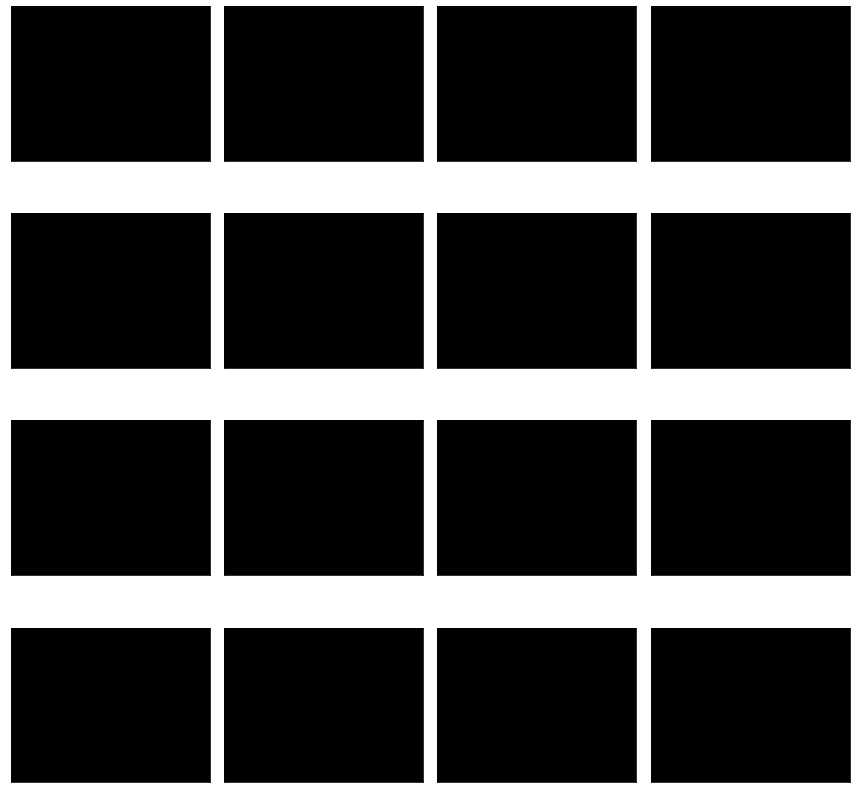

In [0]:
predicted_label = np.squeeze(autoencoder.predict(Z))
plotImages(predicted_label)

# CNN - Basic Model

In [0]:
input_img = tf.keras.layers.Input(shape=(420,540,1), name='image_input')

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss=tf.keras.metrics.mean_squared_error,
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

autoencoder.summary()

Model: "model_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     [(None, 420, 540, 1)]     0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 420, 540, 16)      160       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 210, 270, 16)      0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 210, 270, 8)       1160      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 105, 135, 8)       0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 105, 135, 8)       584       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 53, 68, 8)         0  

In [0]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto', baseline=None, restore_best_weights=True)
autoencoder.fit(X_train, y_train, epochs=100, batch_size=8, callbacks = [callback], validation_data=(X_valid, y_valid))

predicted_label = np.squeeze(autoencoder.predict(Z))

Epoch 1/100
17/17 [==============================] - 1s 55ms/step - loss: 0.1106 - rmse: 0.3330 - val_loss: 0.0747 - val_rmse: 0.2731
Epoch 2/100
17/17 [==============================] - 1s 45ms/step - loss: 0.0828 - rmse: 0.2856 - val_loss: 0.0735 - val_rmse: 0.2710
Epoch 3/100
17/17 [==============================] - 1s 46ms/step - loss: 0.0753 - rmse: 0.2743 - val_loss: 0.0672 - val_rmse: 0.2592
Epoch 4/100
17/17 [==============================] - 1s 45ms/step - loss: 0.0718 - rmse: 0.2682 - val_loss: 0.0650 - val_rmse: 0.2548
Epoch 5/100
17/17 [==============================] - 1s 46ms/step - loss: 0.0661 - rmse: 0.2579 - val_loss: 0.0561 - val_rmse: 0.2367
Epoch 6/100
17/17 [==============================] - 1s 47ms/step - loss: 0.0587 - rmse: 0.2409 - val_loss: 0.0520 - val_rmse: 0.2278
Epoch 7/100
17/17 [==============================] - 1s 46ms/step - loss: 0.0558 - rmse: 0.2360 - val_loss: 0.0505 - val_rmse: 0.2245
Epoch 8/100
17/17 [==============================] - 1s 46ms/s

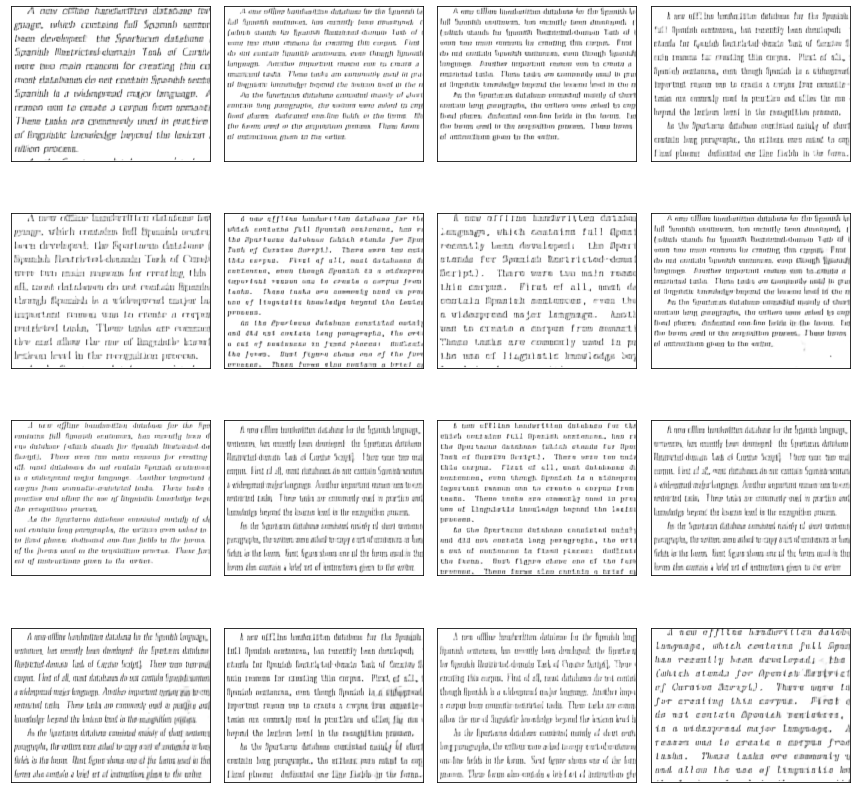

In [0]:
plotImages(predicted_label)

# CNN - Complex Model 1

In [0]:
input_img = tf.keras.layers.Input(shape=(420,540,1), name='image_input')

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)       

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)   

decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='relu', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss=tf.keras.metrics.mean_squared_error,
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

autoencoder.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     [(None, 420, 540, 1)]     0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 420, 540, 128)     1280      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 210, 270, 128)     0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 210, 270, 128)     147584    
_________________________________________________________________
up_sampling2d_10 (UpSampling (None, 420, 540, 128)     0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 420, 540, 1)       1153      
Total params: 150,017
Trainable params: 150,017
Non-trainable params: 0
_____________________________________________________

In [0]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto', baseline=None, restore_best_weights=True)
autoencoder.fit(X_train, y_train, epochs=100, batch_size=8, callbacks = [callback], validation_data=(X_valid, y_valid))

predicted_label = np.squeeze(autoencoder.predict(Z))

Epoch 1/100
17/17 [==============================] - 2s 132ms/step - loss: 0.1426 - rmse: 0.3838 - val_loss: 0.0498 - val_rmse: 0.2235
Epoch 2/100
17/17 [==============================] - 2s 127ms/step - loss: 0.0389 - rmse: 0.1992 - val_loss: 0.0309 - val_rmse: 0.1766
Epoch 3/100
17/17 [==============================] - 2s 128ms/step - loss: 0.0250 - rmse: 0.1585 - val_loss: 0.0252 - val_rmse: 0.1596
Epoch 4/100
17/17 [==============================] - 2s 128ms/step - loss: 0.0195 - rmse: 0.1414 - val_loss: 0.0238 - val_rmse: 0.1551
Epoch 5/100
17/17 [==============================] - 2s 127ms/step - loss: 0.0177 - rmse: 0.1325 - val_loss: 0.0178 - val_rmse: 0.1344
Epoch 6/100
17/17 [==============================] - 2s 128ms/step - loss: 0.0154 - rmse: 0.1251 - val_loss: 0.0174 - val_rmse: 0.1329
Epoch 7/100
17/17 [==============================] - 2s 128ms/step - loss: 0.0141 - rmse: 0.1193 - val_loss: 0.0157 - val_rmse: 0.1258
Epoch 8/100
17/17 [==============================] - 2s

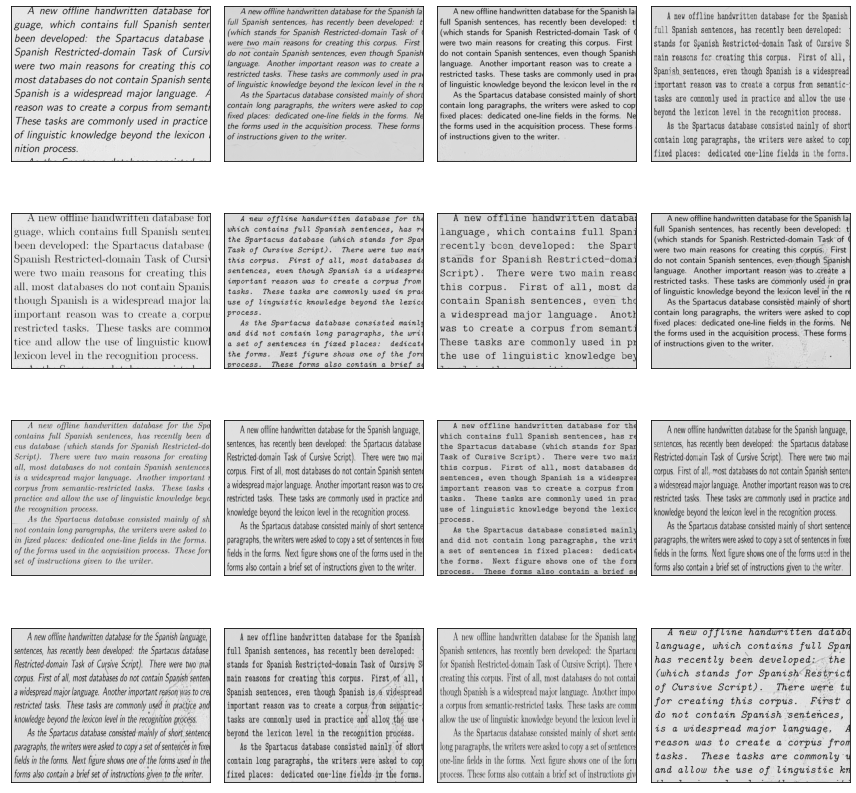

In [0]:
plotImages(predicted_label)

# CNN - Complex Model 2

In [0]:
input_img = tf.keras.layers.Input(shape=(420,540,1), name='image_input')

hidden_1 = tf.keras.layers.Dense(units=64, activation=tf.nn.relu)(input_img)
x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(hidden_1)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)       

x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)   

hidden_2 = tf.keras.layers.Dense(units=64, activation=tf.nn.relu)(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(hidden_2)

autoencoder = tf.keras.models.Model(input_img, decoded)

autoencoder.compile(optimizer='rmsprop', loss=tf.keras.metrics.mean_squared_error,
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

autoencoder.summary()

Model: "model_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     [(None, 420, 540, 1)]     0         
_________________________________________________________________
dense_71 (Dense)             (None, 420, 540, 64)      128       
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 420, 540, 256)     147712    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 210, 270, 256)     0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 210, 270, 256)     590080    
_________________________________________________________________
up_sampling2d_26 (UpSampling (None, 420, 540, 256)     0         
_________________________________________________________________
dense_72 (Dense)             (None, 420, 540, 64)      164

In [0]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto', baseline=None, restore_best_weights=True)
autoencoder.fit(X_train, y_train, epochs=500, batch_size=3, callbacks = [callback], validation_data=(X_valid, y_valid))

predicted_label = np.squeeze(autoencoder.predict(Z))

Epoch 1/500
43/43 [==============================] - 8s 175ms/step - loss: 0.0737 - rmse: 0.2714 - val_loss: 0.0316 - val_rmse: 0.1778
Epoch 2/500
43/43 [==============================] - 7s 172ms/step - loss: 0.0245 - rmse: 0.1565 - val_loss: 0.0113 - val_rmse: 0.1064
Epoch 3/500
43/43 [==============================] - 7s 172ms/step - loss: 0.0104 - rmse: 0.1018 - val_loss: 0.0069 - val_rmse: 0.0829
Epoch 4/500
43/43 [==============================] - 7s 172ms/step - loss: 0.0075 - rmse: 0.0869 - val_loss: 0.0077 - val_rmse: 0.0876
Epoch 5/500
43/43 [==============================] - 7s 172ms/step - loss: 0.0066 - rmse: 0.0813 - val_loss: 0.0052 - val_rmse: 0.0721
Epoch 6/500
43/43 [==============================] - 7s 172ms/step - loss: 0.0048 - rmse: 0.0692 - val_loss: 0.0051 - val_rmse: 0.0717
Epoch 7/500
43/43 [==============================] - 7s 171ms/step - loss: 0.0044 - rmse: 0.0667 - val_loss: 0.0059 - val_rmse: 0.0769
Epoch 8/500
43/43 [==============================] - 7s

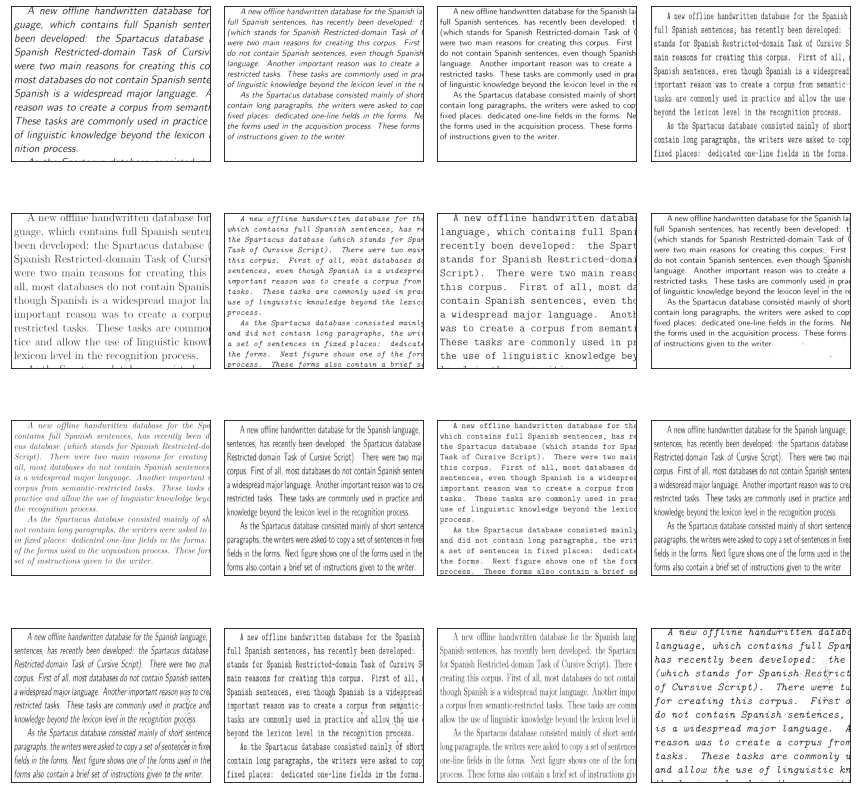

In [0]:
plotImages(predicted_label)